In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline  
import seaborn as sns 
from sklearn.preprocessing import StandardScaler 
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import SGDClassifier 
from sklearn.metrics import log_loss, accuracy_score, precision_recall_fscore_support, confusion_matrix
from sklearn.metrics import mean_squared_error, mean_absolute_error
import datetime as dt

In [2]:
df = pd.read_csv('ks-projects-201801.csv')

In [3]:
df.head()

,ID,name,category,main_category,currency,deadline,goal,launched,pledged,state,backers,country,usd pledged,usd_pledged_real,usd_goal_real
0,1000002330,The Songs of Adelaide & Abullah,Poetry,Publishing,GBP,2015-10-09,1000.0,2015-08-11 12:12:28,0.0,failed,0,GB,0.0,0.0,1533.95
1,1000003930,Greeting From Earth: ZGAC Arts Capsule For ET,Narrative Film,Film & Video,USD,2017-11-01,30000.0,2017-09-02 04:43:57,2421.0,failed,15,US,100.0,2421.0,30000.00
2,1000004038,Where is Hank?,Narrative Film,Film & Video,USD,2013-02-26,45000.0,2013-01-12 00:20:50,220.0,failed,3,US,220.0,220.0,45000.00
3,1000007540,ToshiCapital Rekordz Needs Help to Complete Album,Music,Music,USD,2012-04-16,5000.0,2012-03-17 03:24:11,1.0,failed,1,US,1.0,1.0,5000.00
4,1000011046,Community Film Project: The Art of Neighborhoo...,Film & Video,Film & Video,USD,2015-08-29,19500.0,2015-07-04 08:35:03,1283.0,canceled,14,US,1283.0,1283.0,19500.00


In [4]:
df.describe()

,ID,goal,pledged,backers,usd pledged,usd_pledged_real,usd_goal_real
count,3.786610e+05,3.786610e+05,3.786610e+05,378661.000000,3.748640e+05,3.786610e+05,3.786610e+05
mean,1.074731e+09,4.908079e+04,9.682979e+03,105.617476,7.036729e+03,9.058924e+03,4.545440e+04
std,6.190862e+08,1.183391e+06,9.563601e+04,907.185035,7.863975e+04,9.097334e+04,1.152950e+06
min,5.971000e+03,1.000000e-02,0.000000e+00,0.000000,0.000000e+00,0.000000e+00,1.000000e-02
25%,5.382635e+08,2.000000e+03,3.000000e+01,2.000000,1.698000e+01,3.100000e+01,2.000000e+03
50%,1.075276e+09,5.200000e+03,6.200000e+02,12.000000,3.947200e+02,6.243300e+02,5.500000e+03
75%,1.610149e+09,1.600000e+04,4.076000e+03,56.000000,3.034090e+03,4.050000e+03,1.550000e+04
max,2.147476e+09,1.000000e+08,2.033899e+07,219382.000000,2.033899e+07,2.033899e+07,1.663614e+08


In [5]:
#欠損値を確認
df.isnull().sum()

ID                     0
name                   4
category               0
main_category          0
currency               0
deadline               0
goal                   0
launched               0
pledged                0
state                  0
backers                0
country                0
usd pledged         3797
usd_pledged_real       0
usd_goal_real          0
dtype: int64

In [6]:
#欠損値のある行を削除
df = df.dropna()

In [7]:
#再び欠損値を確認
df.isnull().sum()

ID                  0
name                0
category            0
main_category       0
currency            0
deadline            0
goal                0
launched            0
pledged             0
state               0
backers             0
country             0
usd pledged         0
usd_pledged_real    0
usd_goal_real       0
dtype: int64

In [8]:
#stateを確認
df["state"].value_counts()

failed        197611
successful    133851
canceled       38757
live            2798
suspended       1843
Name: state, dtype: int64

In [9]:
#state列のsuccessfulとfailed以外を削除
df = df[(df["state"] == "successful") | (df["state"] == "failed")]

In [10]:
#deallineとlaunchedから期間を導出
df['deadline'] = pd.to_datetime(df["deadline"])
df["launched"] = pd.to_datetime(df["launched"])
df["days"] = (df["deadline"] - df["launched"]).dt.days

In [11]:
df = df.drop(["deadline","launched"],axis=1)

In [12]:
df.head()

,ID,name,category,main_category,currency,goal,pledged,state,backers,country,usd pledged,usd_pledged_real,usd_goal_real,days
0,1000002330,The Songs of Adelaide & Abullah,Poetry,Publishing,GBP,1000.0,0.0,failed,0,GB,0.0,0.0,1533.95,58
1,1000003930,Greeting From Earth: ZGAC Arts Capsule For ET,Narrative Film,Film & Video,USD,30000.0,2421.0,failed,15,US,100.0,2421.0,30000.00,59
2,1000004038,Where is Hank?,Narrative Film,Film & Video,USD,45000.0,220.0,failed,3,US,220.0,220.0,45000.00,44
3,1000007540,ToshiCapital Rekordz Needs Help to Complete Album,Music,Music,USD,5000.0,1.0,failed,1,US,1.0,1.0,5000.00,29
5,1000014025,Monarch Espresso Bar,Restaurants,Food,USD,50000.0,52375.0,successful,224,US,52375.0,52375.0,50000.00,34


In [13]:
df = df.drop(["ID","name","category"],axis=1)

In [14]:
df.head()

,main_category,currency,goal,pledged,state,backers,country,usd pledged,usd_pledged_real,usd_goal_real,days
0,Publishing,GBP,1000.0,0.0,failed,0,GB,0.0,0.0,1533.95,58
1,Film & Video,USD,30000.0,2421.0,failed,15,US,100.0,2421.0,30000.00,59
2,Film & Video,USD,45000.0,220.0,failed,3,US,220.0,220.0,45000.00,44
3,Music,USD,5000.0,1.0,failed,1,US,1.0,1.0,5000.00,29
5,Food,USD,50000.0,52375.0,successful,224,US,52375.0,52375.0,50000.00,34


In [15]:
df["state"] = df["state"] == "successful"

In [16]:
df.corr()

,goal,pledged,state,backers,usd pledged,usd_pledged_real,usd_goal_real,days
goal,1.000000,0.007962,-0.025096,0.004792,0.006416,0.005949,0.952614,0.022696
pledged,0.007962,1.000000,0.109562,0.718120,0.857966,0.953465,0.005716,0.008036
state,-0.025096,0.109562,1.000000,0.125848,0.095658,0.108359,-0.023732,-0.116466
backers,0.004792,0.718120,0.125848,1.000000,0.697493,0.753221,0.005207,-0.000059
usd pledged,0.006416,0.857966,0.095658,0.697493,1.000000,0.907713,0.006965,0.007718
usd_pledged_real,0.005949,0.953465,0.108359,0.753221,0.907713,1.000000,0.006349,0.008570
usd_goal_real,0.952614,0.005716,-0.023732,0.005207,0.006965,0.006349,1.000000,0.021611
days,0.022696,0.008036,-0.116466,-0.000059,0.007718,0.008570,0.021611,1.000000


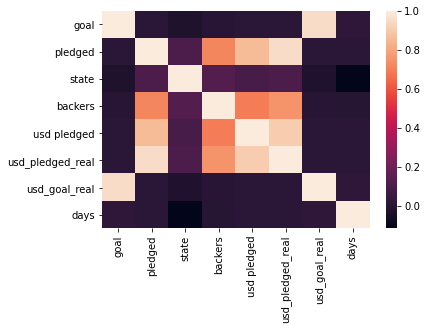

In [17]:
sns.heatmap(df.corr())
plt.show()

In [18]:
df = df.drop(["usd_pledged_real","usd_goal_real"],axis=1)

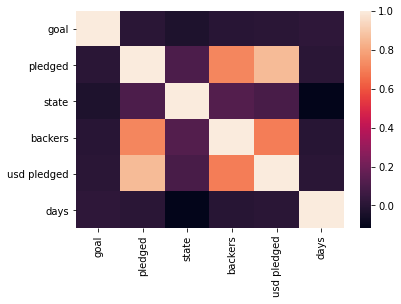

In [19]:
sns.heatmap(df.corr())
plt.show()

In [20]:
df_pledged = pd.DataFrame({'pledged' : df['pledged'], 'usd pledged' : df['usd pledged']})
cov = np.cov(df_pledged, rowvar=0)
_, S = np.linalg.eig(cov)
pledged_decorr = np.dot(S.T, df_pledged.T).T

相関係数: -0.000


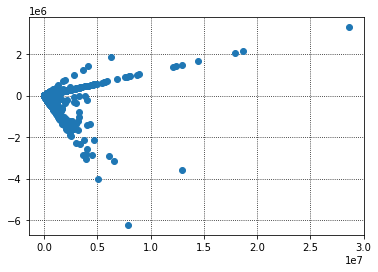

In [21]:
print('相関係数: {:.3f}'.format(np.corrcoef(pledged_decorr[:, 0], pledged_decorr[:, 1])[0,1])) #相関係数を表示
plt.grid(which='major',color='black',linestyle=':') #主罫線について
plt.grid(which='minor',color='black',linestyle=':') #副罫線について
plt.plot(pledged_decorr[:, 0], pledged_decorr[:, 1], 'o') #プロットするデータとプロットに使う記号について
plt.show()

In [22]:
df['pledged'] = pledged_decorr[:,0]
df['usd pledged'] = pledged_decorr[:,1]

In [23]:
df.corr()

,goal,pledged,state,backers,usd pledged,days
goal,1.000000,7.615316e-03,-0.025096,0.004792,-2.459589e-03,0.022696
pledged,0.007615,1.000000e+00,0.107803,0.735369,-5.417327e-15,0.008193
state,-0.025096,1.078025e-01,1.000000,0.125848,-1.982098e-02,-0.116466
backers,0.004792,7.353690e-01,0.125848,1.000000,4.284915e-03,-0.000059
usd pledged,-0.002460,-5.417327e-15,-0.019821,0.004285,1.000000e+00,-0.000118
days,0.022696,8.193196e-03,-0.116466,-0.000059,-1.176495e-04,1.000000


In [24]:
df_pledged2 = pd.DataFrame({'pledged' : df['pledged'], 'backers' : df['backers']})
cov = np.cov(df_pledged2, rowvar=0)
_, S = np.linalg.eig(cov)
pledged2_decorr = np.dot(S.T, df_pledged2.T).T

相関係数: -0.000


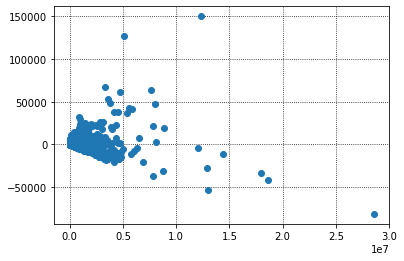

In [25]:
print('相関係数: {:.3f}'.format(np.corrcoef(pledged2_decorr[:, 0], pledged2_decorr[:, 1])[0,1])) #相関係数を表示
plt.grid(which='major',color='black',linestyle=':') #主罫線について
plt.grid(which='minor',color='black',linestyle=':') #副罫線について
plt.plot(pledged2_decorr[:, 0], pledged2_decorr[:, 1], 'o') #プロットするデータとプロットに使う記号について
plt.show()

In [26]:
df['pledged'] = pledged2_decorr[:,0]
df['backers'] = pledged2_decorr[:,1]

In [27]:
df.corr()

,goal,pledged,state,backers,usd pledged,days
goal,1.000000,7.615281e-03,-0.025096,-1.192005e-03,-2.459589e-03,0.022696
pledged,0.007615,1.000000e+00,0.107805,-1.818485e-14,1.830322e-07,0.008193
state,-0.025096,1.078045e-01,1.000000,6.872330e-02,-1.982098e-02,-0.116466
backers,-0.001192,-1.818485e-14,0.068723,1.000000e+00,6.323041e-03,-0.008979
usd pledged,-0.002460,1.830322e-07,-0.019821,6.323041e-03,1.000000e+00,-0.000118
days,0.022696,8.192936e-03,-0.116466,-8.978641e-03,-1.176495e-04,1.000000


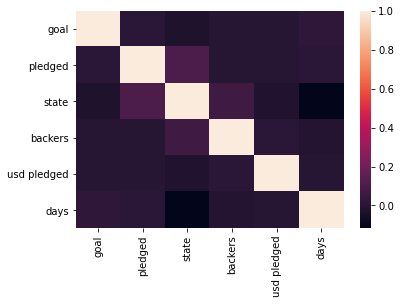

In [28]:
sns.heatmap(df.corr())
plt.show()

In [29]:
df.head()

,main_category,currency,goal,pledged,state,backers,country,usd pledged,days
0,Publishing,GBP,1000.0,0.000000,False,0.000000,GB,0.000000,58
1,Film & Video,USD,30000.0,1958.613072,False,4.022656,US,-1426.634029,59
2,Film & Video,USD,45000.0,309.098962,False,1.267618,US,35.569996,44
3,Music,USD,5000.0,1.410524,False,0.992110,US,0.161682,29
5,Food,USD,50000.0,73583.880519,True,-188.417344,US,8468.084356,34


In [30]:
df_dummy = pd.get_dummies(df["main_category"])
df = pd.concat([df.drop(['main_category'],axis=1),df_dummy],axis=1)

In [31]:
df_dummy = pd.get_dummies(df["currency"])
df = pd.concat([df.drop(['currency'],axis=1),df_dummy],axis=1)

In [32]:
df_dummy = pd.get_dummies(df["country"])
df = pd.concat([df.drop(['country'],axis=1),df_dummy],axis=1)

In [33]:
y = df['state'].values
X = df.drop('state', axis=1).values

test_size = 0.2
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=1234)

In [34]:
stdsc = StandardScaler()
X_train = stdsc.fit_transform(X_train)
X_test = stdsc.transform(X_test)

In [35]:
clf = SGDClassifier(loss='log', penalty='none', max_iter=10000, fit_intercept=True)
clf.fit(X_train, y_train)

SGDClassifier(loss='log', max_iter=10000, penalty='none')

In [36]:
y_prd_train = clf.predict(X_train)




print('対数尤度 = {:.3f}'.format(- log_loss(y_train, y_prd_train)))
print('正答率（Accuracy） = {:.3f}%'.format(100 * accuracy_score(y_train, y_prd_train)))# 正答率を表示
precision, recall, f1_score, _ = precision_recall_fscore_support(y_train, y_prd_train)#適合率・再現率・F1値を計算
print('適合率（Precision） = {:.3f}%'.format(100 * precision[0]))# 適合率を表示
print('再現率（Recall） = {:.3f}%'.format(100 * recall[0]))# 再現率を表示
print('F1値（F1-score） = {:.3f}%'.format(100 * f1_score[0]))#F1値を表示

対数尤度 = -3.238
正答率（Accuracy） = 90.626%
適合率（Precision） = 89.359%
再現率（Recall） = 95.634%
F1値（F1-score） = 92.390%


In [37]:
y_prd_test = clf.predict(X_test)


print('対数尤度 = {:.3f}'.format(- log_loss(y_test, y_prd_test)))# '対数尤度 を表示
print('正答率（Accuracy） = {:.3f}%'.format(100 * accuracy_score(y_test, y_prd_test)))# 正答率を表示
precision, recall, f1_score, _ = precision_recall_fscore_support(y_test, y_prd_test)#適合率・再現率・F1値を計算
print('適合率（Precision） = {:.3f}%'.format(100 * precision[0]))# 適合率を表示
print('再現率（Recall） = {:.3f}%'.format(100 * recall[0]))# 再現率を表示
print('F1値（F1-score） = {:.3f}%'.format(100 * f1_score[0]))#F1値を表示

対数尤度 = -3.263
正答率（Accuracy） = 90.554%
適合率（Precision） = 89.516%
再現率（Recall） = 95.458%
F1値（F1-score） = 92.392%
